In [1]:
import sys
import pickle
import matplotlib.pyplot as plt
import PyHEADTAIL

sys.path.append('../../../utils')
from coordinatesConversions import *
from cmpt_TuneSpreads import *

PyHEADTAIL v1.13.5




In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.close('all')

### Machine parameters, needed for the post process analysis

In [3]:
macroparticlenumber = int(5e5)
n_segments =2
alpha_x = 0 * np.ones(n_segments)  
beta_x = 30.31164764 * np.ones(n_segments)
alpha_y = 0 * np.ones(n_segments)  
beta_y = 73.81671646 * np.ones(n_segments)

In [4]:
# detuning coefficients in (1/m)
app_x = 153.8183853  #2.4705e-15 #4e-11
app_xy = -416.0175086  #-0*2.25e-11
app_y = -50.03699877 #-7.31-14 #0*3e-11

### Coherent tune shift 

From the motion of the centroid using NAFFlib.
Initial offset in x and y 1e-4

In [5]:
Qx_coherent_wakes = 0.12997506616624357
Qy_coherent_wakes = 0.17955934570498355

In [6]:
Qx_coherent_nowakes = 0.1299951672397874
Qy_coherent_nowakes = 0.1799906063619161

### Load the tunes for each particle as obtained from tracking

In [7]:
Qx_incoherent_wakes = pickle.load(open('Qx_file.pkl', 'rb'))
Qy_incoherent_wakes = pickle.load(open('Qy_file.pkl', 'rb'))

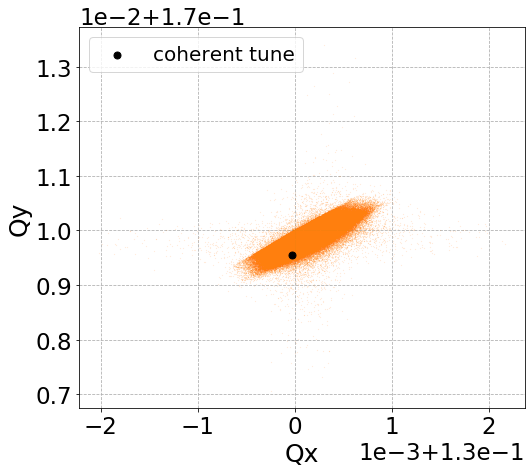

In [8]:
plt.plot(Qx_incoherent_wakes, Qy_incoherent_wakes, '.', c='C1', ms=0.1)
plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)
plt.legend(loc=2)

### Compute the incoherent tune shift with amplitude without wakefields

1) Load the initial distribution

2) Compute initial normalised coordinates

3) Compute initial actions

4) Analytically compute the tune shift with amplotiude

In [9]:
# Load the initial distribution to apply the condition in the initial positions
file2 = open(f'bunch2', 'rb')
bunch = pickle.load(file2)
file2.close()

# Switch to action angle coordinates
x_n, xp_n = cmpt_normalised_coordinates(bunch.x, bunch.xp, beta_x[0], alpha_x[0])
y_n, yp_n = cmpt_normalised_coordinates(bunch.y, bunch.yp, beta_y[0], alpha_y[0])


Jx, Jy = cmpt_actions(x_n, xp_n), cmpt_actions(y_n, yp_n)

Qx_incoherent_nowakes = 0.13+amplitude_detuning_x(Jx, Jy, app_x, app_xy)
Qy_incoherent_nowakes = 0.18+amplitude_detuning_y(Jx, Jy, app_y, app_xy)

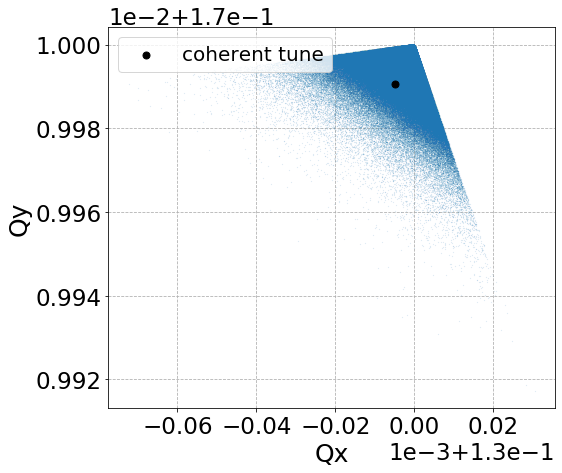

In [10]:
plt.plot(Qx_incoherent_nowakes, Qy_incoherent_nowakes, '.', c='C0', ms=0.1)
plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_nowakes, Qy_coherent_nowakes, c='k', zorder=50, label='coherent tune')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)
plt.legend(loc=2)

### Footprint with wakes vs without wakes

(0.129, 0.131)

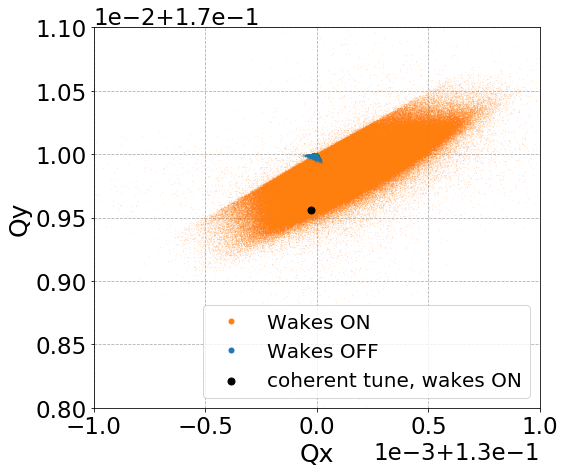

In [11]:
plt.plot(Qx_incoherent_wakes, Qy_incoherent_wakes, '.', c='C1', ms=0.1)
plt.plot(Qx_incoherent_nowakes, Qy_incoherent_nowakes, '.', c='C0', ms=0.1)
plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune, wakes ON')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)

# Plotting for visible legends
plt.plot(0, 0, '.', c='C1', ms=10, label='Wakes ON')
plt.plot(0, 0, '.', c='C0', ms=10, label='Wakes OFF')

plt.legend(loc=4)


plt.ylim(0.178, 0.181)
plt.xlim(0.129, 0.131)

In [12]:
import pandas as pd
data ={'Qx':Qx_incoherent_wakes, 'Qy':Qy_incoherent_wakes, 'z init':bunch.z, 'dp init':bunch.dp, 'Jx init':list(Jx), 'Jy init':list(Jy), 'sigma z':list(np.zeros(macroparticlenumber)), 'sigma dp':list(np.zeros(macroparticlenumber))}
# Create the pandas DataFrame 
df = pd.DataFrame(data)

In [13]:
df

,Qx,Qy,z init,dp init,Jx init,Jy init,sigma z,sigma dp
0,0.129879,0.179604,-0.021615,-0.000538,2.949111e-10,6.234441e-09,0.0,0.0
1,0.130095,0.179800,-0.020636,-0.000023,9.541485e-10,1.817375e-08,0.0,0.0
2,0.130484,0.180160,-0.060207,0.000613,4.352485e-09,9.188815e-09,0.0,0.0
3,0.130547,0.180152,-0.058765,0.000594,4.551174e-09,8.475867e-09,0.0,0.0
4,0.130134,0.179947,0.150964,0.000083,2.484631e-09,3.798682e-09,0.0,0.0
...,...,...,...,...,...,...,...,...
499995,0.130087,0.179851,0.071858,-0.000039,3.380864e-09,1.748997e-08,0.0,0.0
499996,0.130485,0.180040,0.038999,0.000333,3.779043e-10,6.678398e-09,0.0,0.0
499997,0.129766,0.179659,0.190017,-0.000619,6.790531e-09,1.907061e-09,0.0,0.0
499998,0.130337,0.180205,0.137774,0.000507,5.866510e-09,2.092306e-09,0.0,0.0


In [14]:
### filter in sigma
rms_z = np.std(bunch.z)
rms_dp = np.std(bunch.dp)


In [15]:
df.loc[abs(df['z init']) < 5*rms_z, 'sigma z']=5.0
df.loc[abs(df['z init']) <= 4*rms_z, 'sigma z']=4.0
df.loc[abs(df['z init']) <= 3*rms_z, 'sigma z']=3.0
df.loc[abs(df['z init']) <= 2*rms_z, 'sigma z']=2.0
df.loc[abs(df['z init']) <= rms_z, 'sigma z']=1.0


In [16]:
df

,Qx,Qy,z init,dp init,Jx init,Jy init,sigma z,sigma dp
0,0.129879,0.179604,-0.021615,-0.000538,2.949111e-10,6.234441e-09,1.0,0.0
1,0.130095,0.179800,-0.020636,-0.000023,9.541485e-10,1.817375e-08,1.0,0.0
2,0.130484,0.180160,-0.060207,0.000613,4.352485e-09,9.188815e-09,1.0,0.0
3,0.130547,0.180152,-0.058765,0.000594,4.551174e-09,8.475867e-09,1.0,0.0
4,0.130134,0.179947,0.150964,0.000083,2.484631e-09,3.798682e-09,1.0,0.0
...,...,...,...,...,...,...,...,...
499995,0.130087,0.179851,0.071858,-0.000039,3.380864e-09,1.748997e-08,1.0,0.0
499996,0.130485,0.180040,0.038999,0.000333,3.779043e-10,6.678398e-09,1.0,0.0
499997,0.129766,0.179659,0.190017,-0.000619,6.790531e-09,1.907061e-09,2.0,0.0
499998,0.130337,0.180205,0.137774,0.000507,5.866510e-09,2.092306e-09,1.0,0.0


In [17]:
df.groupby('sigma z').count()

,Qx,Qy,z init,dp init,Jx init,Jy init,sigma dp
sigma z,,,,,,,
1.0,341225,341225,341225,341225,341225,341225,341225
2.0,135979,135979,135979,135979,135979,135979,135979
3.0,21445,21445,21445,21445,21445,21445,21445
4.0,1317,1317,1317,1317,1317,1317,1317
5.0,34,34,34,34,34,34,34


## Dependence on initial z

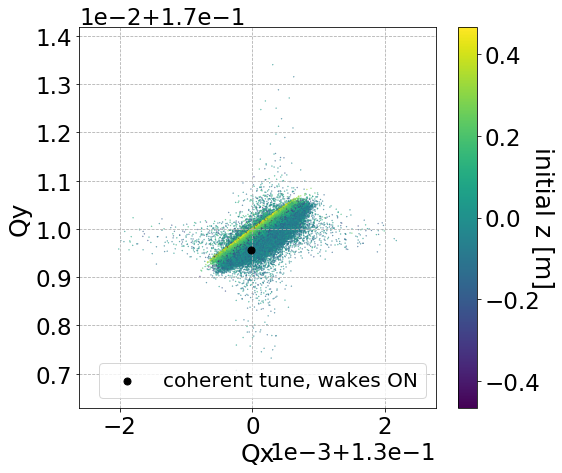

In [43]:
fig, ax = plt.subplots()

vmin = -3*np.std(df['z init']) # zoom in to 3 sigma(std)z
vmax= 3*np.std(df['z init'])

cb2 = ax.scatter(df['Qx'], df['Qy'],c=df['z init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)
mpl2.set_label('initial z [m]', labelpad=15, rotation=270)

plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune, wakes ON')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)
plt.legend(loc=4)

### Plot only the head (z<0 according to the pyheadtail conversion)

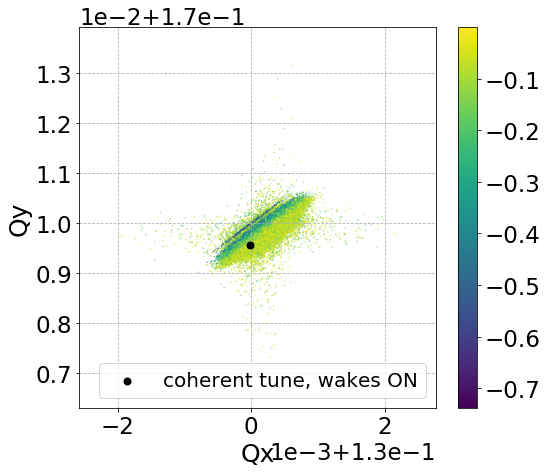

In [39]:
df2 = df.loc[df['z init'] < 0 ]
fig, ax = plt.subplots()

vmin = np.min(df2['z init'])
vmax= np.max(df2['z init'])

cb2 = ax.scatter(df2['Qx'], df2['Qy'], c=df2['z init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)
mpl2.set_label('initial z [m]', labelpad=15, rotation=270)#,fontsize=25)


plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune, wakes ON')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)

plt.legend(loc=4)

### Plot only the tail (z>0 according to the pyheadtail conversion)

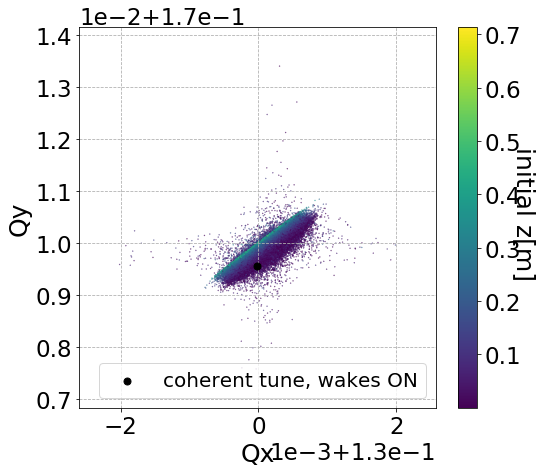

In [86]:
df3 = df.loc[df['z init'] >= 0 ]
fig, ax = plt.subplots()

vmin = np.min(df3['z init'])
vmax= np.max(df3['z init'])

cb2 = ax.scatter(df3['Qx'], df3['Qy'], c=df3['z init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)
mpl2.set_label('initial z[m] ', labelpad=15, rotation=270)#,fontsize=25)

plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune, wakes ON')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)

plt.legend(loc=4)

### Chorect chroma

In [80]:
Qx_new = df['Qx'] - 0.5* df['dp init']
Qy_new = df['Qy'] - 0.5* df['dp init']

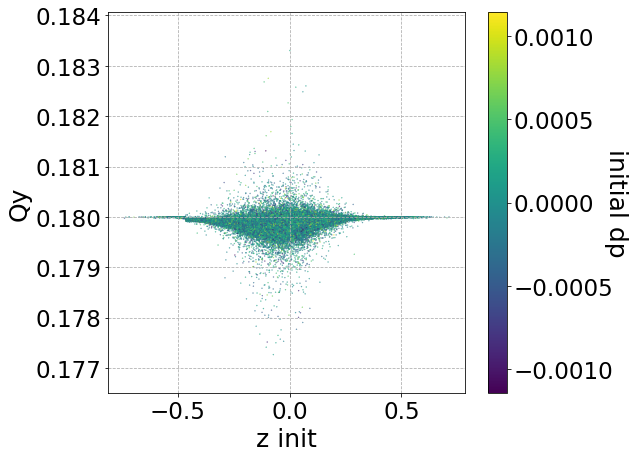

In [91]:
fig, ax = plt.subplots()

vmin = -3*np.std(df['dp init'])
vmax=3*np.std(df['dp init'])

cb2 = ax.scatter(df['z init'], Qy_new, c=df['dp init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)
mpl2.set_label('initial dp', labelpad=15, rotation=270)#,fontsize=25)

plt.xlabel('z init')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')

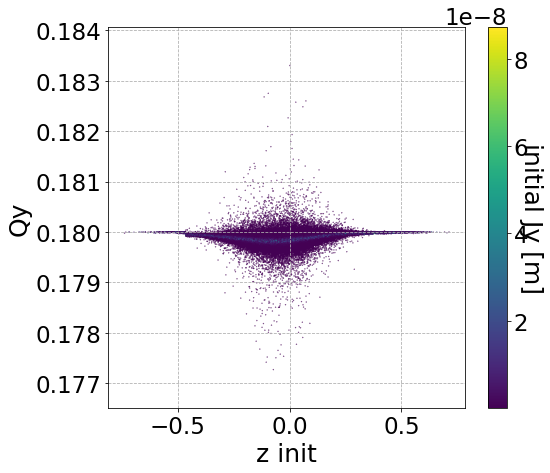

In [97]:
fig, ax = plt.subplots()

# colors from 0 up to 3sigmaJy
vmin = np.min(df['Jy init']) 
vmax= 3*np.std(df['Jy init'])

cb2 = ax.scatter(df['z init'], Qy_new, c=df['Jy init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)
mpl2.set_label('initial Jy [m]', labelpad=30, rotation=270)

plt.xlabel('z init')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')

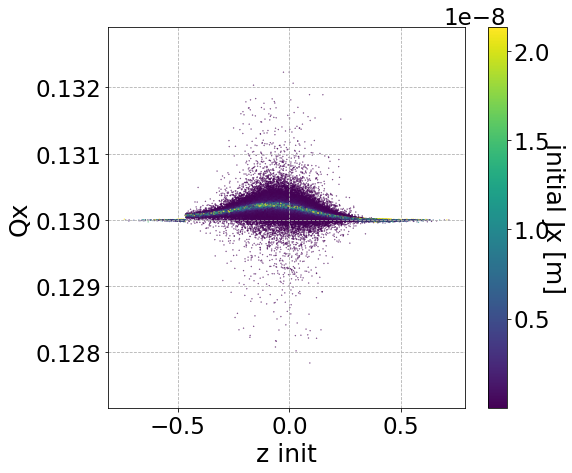

In [98]:
fig, ax = plt.subplots()

# colors from 0 up to 3sigmaJy
vmin = np.min(df['Jx init']) 
vmax= 3*np.std(df['Jx init'])

cb2 = ax.scatter(df['z init'], Qx_new, c=df['Jx init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)
mpl2.set_label('initial Jx [m]', labelpad=30, rotation=270)
plt.xlabel('z init')
plt.ylabel('Qx')
plt.grid(linestyle='dashed')

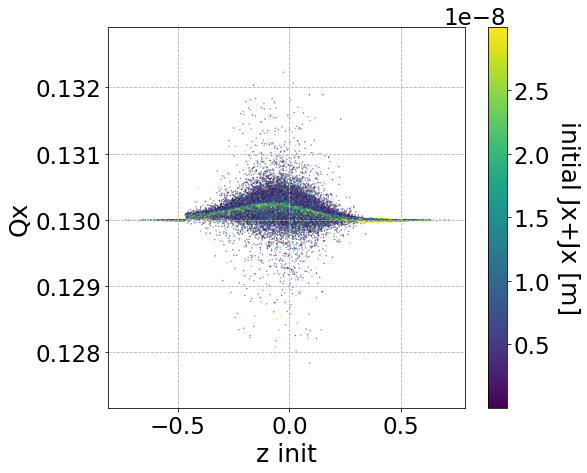

In [100]:
fig, ax = plt.subplots()

# colors from 0 up to 3sigmaJy
vmin = np.min(df['Jx init']+df['Jy init']) 
vmax= 3*np.std(df['Jx init']+df['Jy init'])

cb2 = ax.scatter(df['z init'], Qx_new, c=df['Jx init']+df['Jy init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)
mpl2.set_label('initial Jx+Jx [m]', labelpad=30, rotation=270)
plt.xlabel('z init')
plt.ylabel('Qx')
plt.grid(linestyle='dashed')

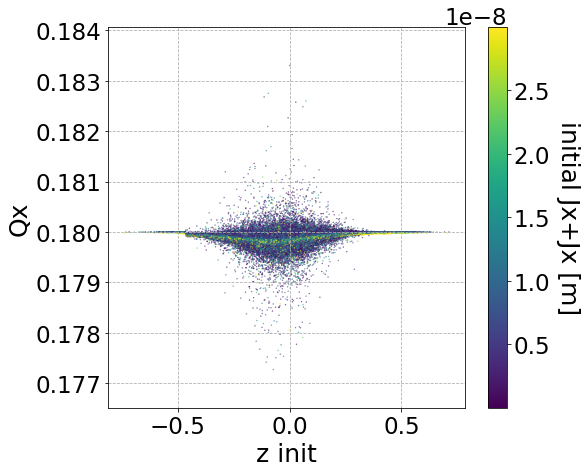

In [101]:
fig, ax = plt.subplots()

# colors from 0 up to 3sigmaJy
vmin = np.min(df['Jx init']+df['Jy init']) 
vmax= 3*np.std(df['Jx init']+df['Jy init'])

cb2 = ax.scatter(df['z init'], Qy_new, c=df['Jx init']+df['Jy init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)
mpl2.set_label('initial Jx+Jx [m]', labelpad=30, rotation=270)

plt.xlabel('z init')
plt.ylabel('Qx')
plt.grid(linestyle='dashed')

### Dependence on initial dp

- Via the chromaticity

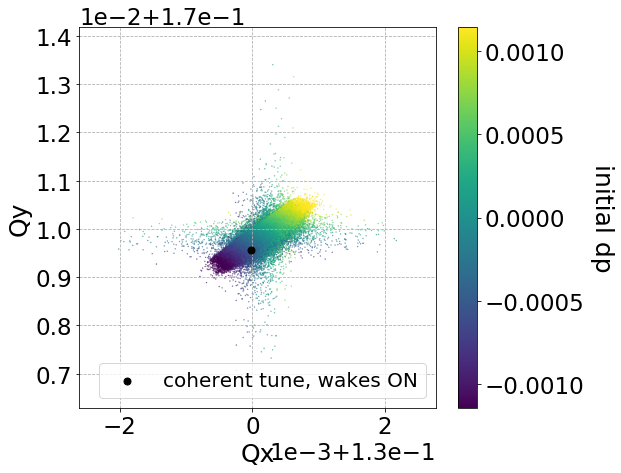

In [104]:
fig, ax = plt.subplots()

vmin =-3*np.std(df['dp init'])
vmax= 3*np.std(df['dp init'])

cb2 = ax.scatter(df['Qx'], df['Qy'],c=df['dp init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)
mpl2.set_label('initial dp', labelpad=30, rotation=270)


plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune, wakes ON')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)

plt.legend(loc=4)

### Dependence on action, Jy

- via the amplitude detuning

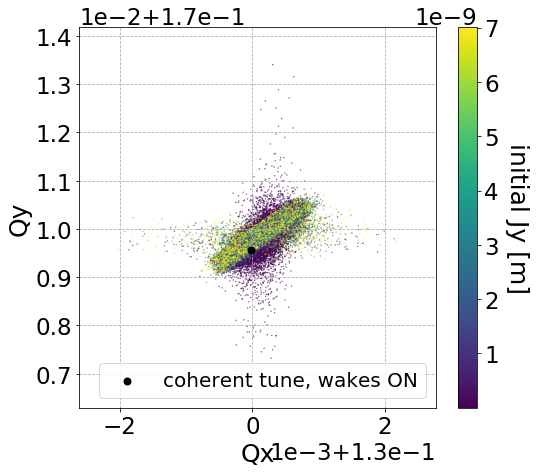

In [105]:
fig, ax = plt.subplots()

vmin = np.min(df['Jy init'])
vmax= np.std(df['Jy init'])

cb2 = ax.scatter(df['Qx'], df['Qy'],c=df['Jy init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)

mpl2.set_label('initial Jy [m]', labelpad=30, rotation=270)


plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune, wakes ON')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)

plt.legend(loc=4)


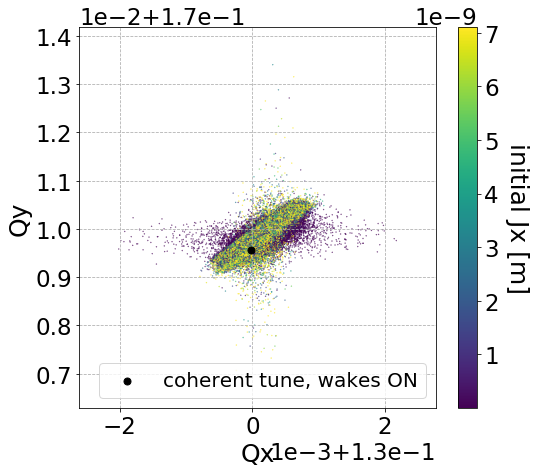

In [107]:
fig, ax = plt.subplots()

vmin = np.min(df['Jx init'])
vmax= np.std(df['Jx init'])

cb2 = ax.scatter(df['Qx'], df['Qy'],c=df['Jx init'], s=0.1, vmin=vmin, vmax=vmax, cmap='viridis')
mpl2 = fig.colorbar(cb2)

mpl2.set_label('initial Jx [m]', labelpad=30, rotation=270)


plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune, wakes ON')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)

plt.legend(loc=4)


(0.129, 0.131)

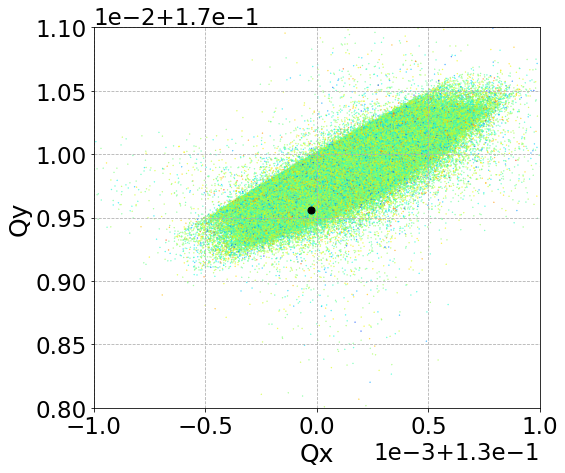

In [151]:
#plt.scatter(Qx_incoherent_wakes, Qy_incoherent_wakes, c=bunch.z,  s=0.1, cmap='jet')


#plt.plot(Qx_incoherent_nowakes, Qy_incoherent_nowakes, '.', c='C0', ms=0.1)
plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune, wakes ON')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)

# Plotting for visible legends
plt.plot(0, 0, '.', c='C1', ms=10, label='Wakes ON')
plt.plot(0, 0, '.', c='C0', ms=10, label='Wakes OFF')

#plt.legend(loc=4)


plt.ylim(0.178, 0.181)
plt.xlim(0.129, 0.131)

### Limit the plot at 3$\sigma_{x,y}$

3 $\sigma_{x,y}$ =3 $\sigma_{J_{x,y}}$ =3 rms(J_{x,y})


In [32]:
Jx_rms, Jy_rms = np.std(Jx), np.std(Jy)
print(Jx_rms, Jy_rms)

7.122767079996483e-09 7.013092013150177e-09


In [40]:
Qx_incoherent_wakes_filtered, Qy_incoherent_wakes_filtered =[], []
Qx_incoherent_nowakes_filtered, Qy_incoherent_nowakes_filtered =[], []

for particle in range(macroparticlenumber):
    if  Jx[particle] <= 3*Jx_rms:
        if Jx[particle] <= 3*Jy_rms:
            Qx_incoherent_wakes_filtered.append(Qx_incoherent_wakes[particle])
            Qy_incoherent_wakes_filtered.append(Qy_incoherent_wakes[particle])
            Qx_incoherent_nowakes_filtered.append(Qx_incoherent_nowakes[particle])
            Qy_incoherent_nowakes_filtered.append(Qy_incoherent_nowakes[particle])

(0.178, 0.181)

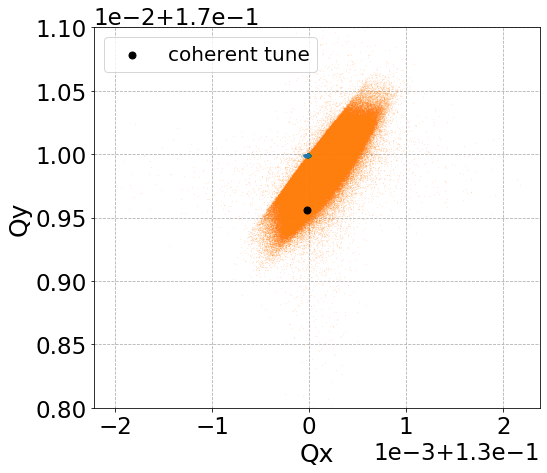

In [47]:
plt.plot(Qx_incoherent_wakes_filtered, Qy_incoherent_wakes_filtered, '.', c='C1', ms=0.1)
plt.plot(Qx_incoherent_nowakes_filtered, Qy_incoherent_nowakes_filtered, '.', c='C0', ms=0.1)
plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)
plt.legend(loc=2)

plt.ylim(0.178, 0.181)

In [14]:
# Load the initial distribution to apply the condition in the initial positions
file2 = open(f'bunch2', 'rb')
bunch = pickle.load(file2)
file2.close()

# Switch to action angle coordinates
x_n, xp_n = cmpt_normalised_coordinates(bunch.x, bunch.xp, beta_x[0], alpha_x[0])
y_n, yp_n = cmpt_normalised_coordinates(bunch.y, bunch.yp, beta_y[0], alpha_y[0])


Jx, Jy = cmpt_actions(x_n, xp_n), cmpt_actions(y_n, yp_n)
Jx_max, Jy_max = np.max(Jx), np.max(Jy)



Qx_list_good =[]
Qy_list_good=[]

for particle in range(macroparticlenumber):
    if Jx[particle]/Jx_max + Jy[particle]/Jy_max < 1:
        Qx_list_good.append(Qx_list[particle])
        Qy_list_good.append(Qy_list[particle])
        

### Plotting

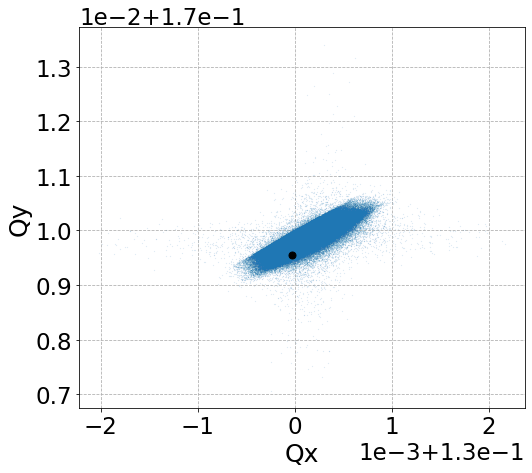

In [15]:
plt.plot(Qx_list_good, Qy_list_good, '.', c='C0', ms=0.1)
plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50)
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)


### Plot the incoherent tune spread without the wakefields

In [16]:
# detuning coefficients in (1/m)
app_x = 153.8183853  #2.4705e-15 #4e-11
app_xy = -416.0175086  #-0*2.25e-11
app_y = -50.03699877 #-7.31-14 #0*3e-11

In [17]:
Qx_incoherent_analytical = []
Qy_incoherent_analytical = []
for particle in range(macroparticlenumber):
    if Jx[particle]/Jx_max + Jy[particle]/Jy_max < 1:
        Qx_incoherent_analytical.append(amplitude_detuning_x(Jx[particle], Jy[particle], app_x, app_xy))
        Qy_incoherent_analytical.append(amplitude_detuning_y(Jx[particle], Jy[particle], app_y, app_xy))

print(len(Qy_incoherent_analytical))

489993


In [18]:
Qx_incoherent_analytical = amplitude_detuning_x(Jx, Jy, app_x, app_xy)
Qy_incoherent_analytical = amplitude_detuning_y(Jx, Jy, app_y, app_xy)

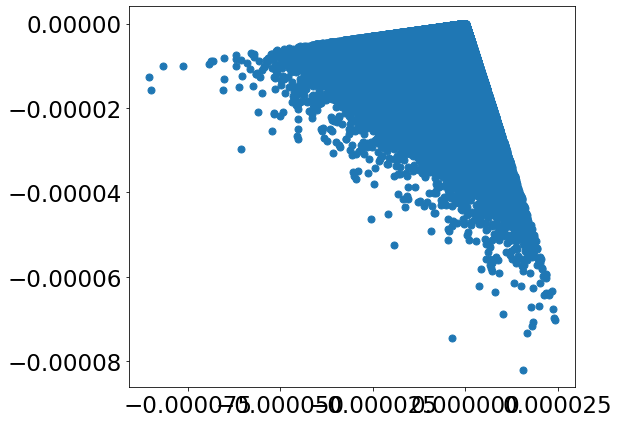

In [19]:
plt.plot(Qx_incoherent_analytical, Qy_incoherent_analytical, 'o')

/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


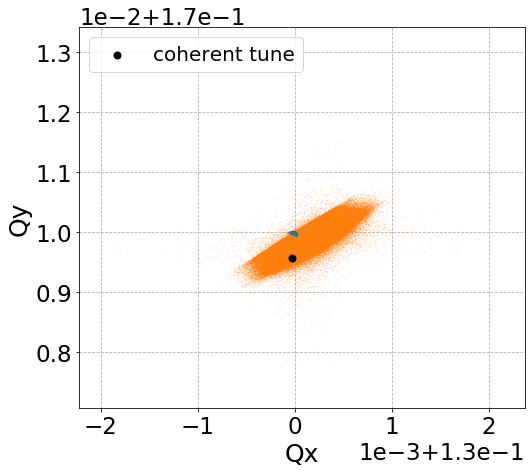

In [20]:
fig, ax = plt.subplots()

ax.plot(Qx_list_good, Qy_list_good, '.', c='C1', ms=0.1)
ax.plot(0.13+np.array(Qx_incoherent_analytical), 0.18+np.array(Qy_incoherent_analytical), '.', c='C0', ms=0.1)

ax.set_xlabel('Qx')
ax.set_ylabel('Qy')
ax.grid(linestyle='dashed')
ax.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune')
ax.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
ax.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)
ax.legend()

ax.set_ylim(np.min(Qy_list_good), np.max(Qy_list_good))

savefig = False

if savefig:
    plt.savefig('SPS_incoherentTune_wakesVSnoWakes.png', bbox_inches='tight')